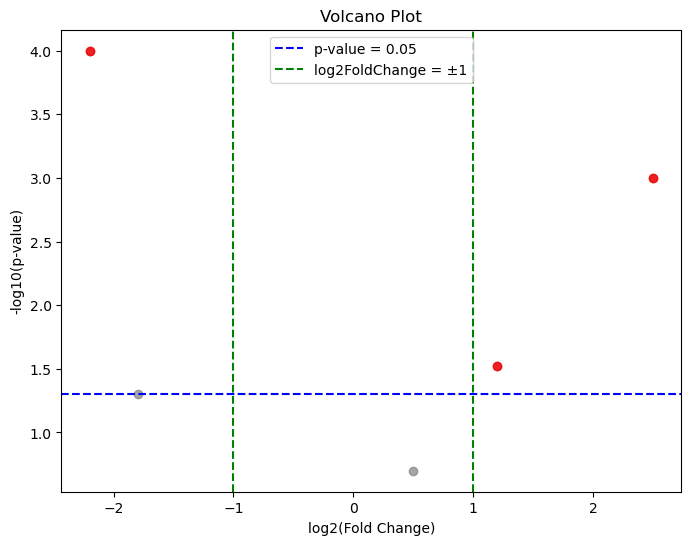

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = {
    'Gene': ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5'],
    'log2FoldChange': [2.5, -1.8, 0.5, -2.2, 1.2],
    'pvalue': [0.001, 0.05, 0.2, 0.0001, 0.03]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add -log10(p-value) for plotting
df['-log10(pvalue)'] = -np.log10(df['pvalue'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['log2FoldChange'], df['-log10(pvalue)'], color='gray', alpha=0.7)

# Highlight significant points
significant = df[(df['pvalue'] < 0.05) & (abs(df['log2FoldChange']) > 1)]
plt.scatter(significant['log2FoldChange'], significant['-log10(pvalue)'], color='red', alpha=0.8)

# Add labels and lines
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', label='p-value = 0.05')
plt.axvline(1, color='green', linestyle='--', label='log2FoldChange = ±1')
plt.axvline(-1, color='green', linestyle='--')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.show()


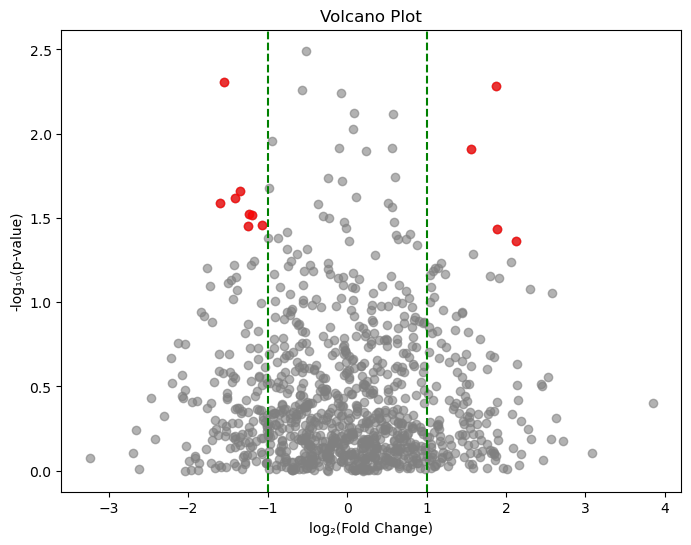

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data
np.random.seed(42)
data = pd.DataFrame({
    'log2FoldChange': np.random.randn(1000),
    'pvalue': np.random.rand(1000)
})
data['-log10(pvalue)'] = -np.log10(data['pvalue'])

# Thresholds
foldchange_cutoff = 1
pvalue_cutoff = 0.05

# Plot
plt.figure(figsize=(8,6))
plt.scatter(data['log2FoldChange'], data['-log10(pvalue)'], color='grey', alpha=0.6)

# Highlight significant points
sig = (abs(data['log2FoldChange']) > foldchange_cutoff) & (data['pvalue'] < pvalue_cutoff)
plt.scatter(data.loc[sig, 'log2FoldChange'], data.loc[sig, '-log10(pvalue)'], color='red', alpha=0.7)

plt.axhline(-np.log10(pvalue_cutoff), color='blue', linestyle='')
plt.axvline(-foldchange_cutoff, color='green', linestyle='--')
plt.axvline(foldchange_cutoff, color='green', linestyle='--')

plt.title('Volcano Plot')
plt.xlabel('log₂(Fold Change)')
plt.ylabel('-log₁₀(p-value)')
plt.show()


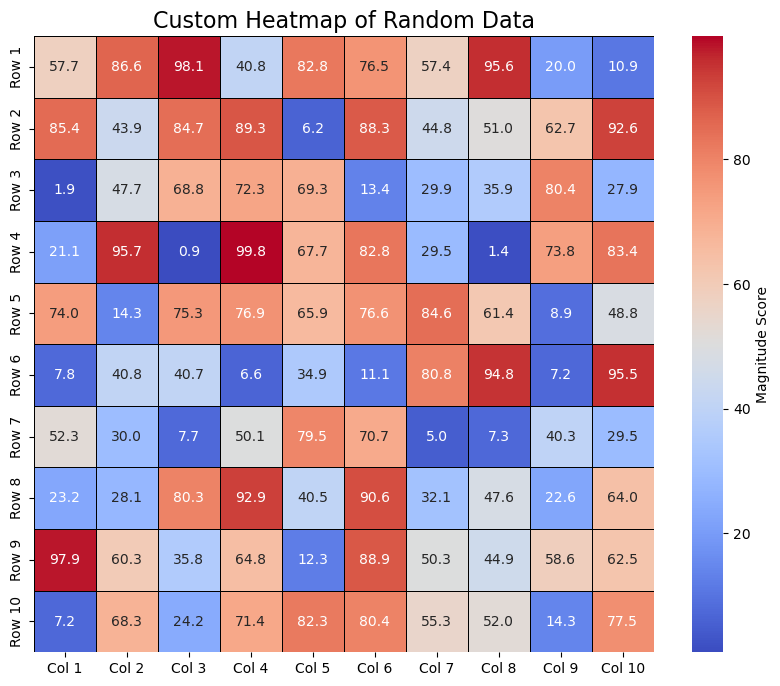

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the Data
# Create a 2D dataset (e.g., a correlation matrix or a data matrix)
# In this example, we'll use a random 10x10 matrix of values
data = np.random.rand(10, 10) * 100
df = pd.DataFrame(data, 
                  columns=[f'Col {i}' for i in range(1, 11)],
                  index=[f'Row {i}' for i in range(1, 11)])

# 2. Create the Heatmap
plt.figure(figsize=(10, 8)) # Set the figure size

sns.heatmap(
    df,
    annot=True,              # Show the numerical value in each cell
    fmt=".1f",               # Format the annotation to one decimal place
    cmap="coolwarm",         # Choose a diverging colormap (e.g., coolwarm, RdBu_r)
    linewidths=.5,           # Add lines between cells for clarity
    linecolor='black',       # Color of the separation lines
    cbar_kws={'label': 'Magnitude Score'} # Label for the color bar
)

# 3. Add Titles and Show
plt.title('Custom Heatmap of Random Data', fontsize=16)
plt.show()

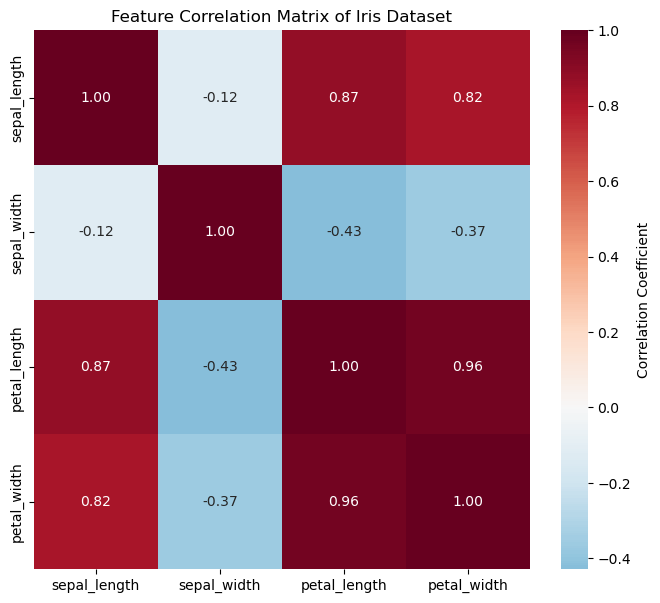

In [13]:
# Assuming 'data' is a DataFrame with multiple columns of numerical data
# Example: Using the built-in iris dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset for correlation
iris = sns.load_dataset("iris")
correlation_matrix = iris.select_dtypes(include=['number']).corr() 

plt.figure(figsize=(8, 7))

sns.heatmap(
    correlation_matrix,
    annot=True,         # Show correlation coefficient in each cell
    fmt=".2f",          # Format to two decimal places
    cmap="RdBu_r",      # A good diverging map for correlation (Red-Blue, reversed)
    center=0,           # Center the colormap at zero
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Feature Correlation Matrix of Iris Dataset')
plt.show()

In [23]:
import plotly.express as px
import pandas as pd

# 1. Prepare the Data
# Data should be structured with categories (variables) and scores for different entities.
data = {
    'Skill': ['Speed', 'Agility', 'Strength', 'Stamina', 'Technique'],
    'Athlete A': [8, 7, 5, 9, 6],
    'Athlete B': [5, 8, 9, 4, 7]
}
df = pd.DataFrame(data)

# To use Plotly Express, we need the data in "long" format
# Melt the DataFrame to have 'Entity' (Athlete A/B) and 'Score' columns
df_long = df.melt(
    id_vars='Skill',
    var_name='Entity',
    value_name='Score'
)

# 2. Create the Radar Chart using Plotly Express
fig = px.line_polar(
    df_long,
    r='Score',                 # The radial variable (the length of the spoke)
    theta='Skill',             # The angular variable (the categories on the axes)
    color='Entity',            # How to group the data (creates a line for each athlete)
    line_close=True,           # Close the line to form the "web" polygon
    title="Athlete Performance Comparison"
)

# Customize layout for better appearance
fig.update_traces(fill='toself') # Fills the area inside the web for better comparison
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 10]  # Set the maximum possible score for the axes
        )
    ),
    showlegend=True
)

# 3. Display the chart
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import plot, from_indicators

# Create a sample dataset for movie genres (binary indicator format)
# 1 indicates the movie belongs to the genre, 0 means it does not.
data = {
    'Movie': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10'],
    'Action': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    'Comedy': [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
    'Drama':  [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'SciFi':  [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
}

df = pd.DataFrame(data)

# The 'upsetplot' library requires data to be grouped by the indicator columns
# and the size of each intersection calculated.
# We use from_indicators to transform the binary indicator columns into the required format.
upset_data = from_indicators(
    df.set_index(df.columns[1:]).index
)

# Generate and display the plot
plt.figure(figsize=(10, 6)) # Set a good figure size
plot(
    upset_data,
    sort_by='cardinality',  # Sort the intersections by their size (count)
    show_counts=True        # Display the count above each bar
)

plt.suptitle("UpSet Plot of Movie Genre Intersections", y=1.02)
plt.show()
#

ModuleNotFoundError: No module named 'upsetplot'

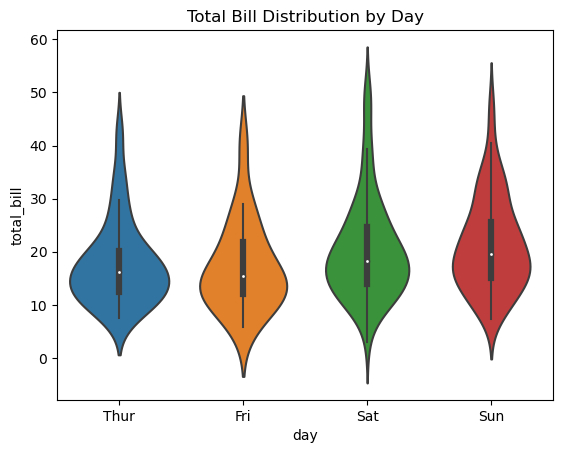

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset (e.g., the 'tips' dataset)
df = sns.load_dataset("tips")

# Create the violin plot
# x is the categorical variable (the groups)
# y is the numerical variable (the distribution to plot)
sns.violinplot(x="day", y="total_bill", data=df)

# Show the plot
plt.title("Total Bill Distribution by Day")
plt.show()